In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# ベクトル化する文字列
sample = np.array(['Apple computer of the apple mark', 'linux computer', 'windows computer'])

# CountVectorizer
vec_count = CountVectorizer()

# ベクトル化
vec_count.fit(sample)
X = vec_count.transform(sample)

print('Vocabulary size: {}'.format(len(vec_count.vocabulary_)))
print('Vocabulary content: {}'.format(vec_count.vocabulary_))
X

Vocabulary size: 7
Vocabulary content: {'apple': 0, 'computer': 1, 'of': 4, 'the': 5, 'mark': 3, 'linux': 2, 'windows': 6}


<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [2]:
pd.DataFrame(X.toarray(), columns=vec_count.get_feature_names())

,apple,computer,linux,mark,of,the,windows
0,2,1,0,1,1,1,0
1,0,1,1,0,0,0,0
2,0,1,0,0,0,0,1


['linux computer', 'apple computer', 'computer of', 'of the', 'the apple', 'apple mark', 'mark linux', 'windows computer']


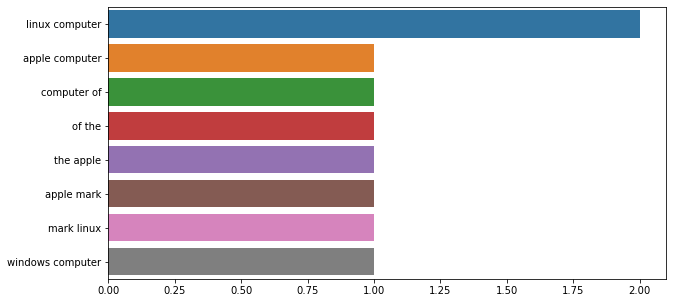

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    # print(vec.vocabulary_)
    bag_of_words = vec.transform(corpus) # 下のURL参照
    # print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0) # 各列で出現回数を足している
    # print(sum_words.shape)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # print(words_freq)
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

sample = np.array(['Apple computer of the apple mark, linux computer', 'linux computer', 'windows computer'])
    
plt.figure(figsize=(10,5))
top_tweet_bigrams = get_top_tweet_bigrams(sample)[:10]
x,y = map(list,zip(*top_tweet_bigrams))
print(x)
sns.barplot(x=y,y=x)

[bag_of_words](https://kavita-ganesan.com/how-to-use-countvectorizer/#.XwshWCj7SMA)

In [13]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    temp = text.split('#')
    misspelled_words = spell.unknown(temp)
    for word in temp:
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "corect#me#plese"
correct_spellings(text)

'correct me please'

In [5]:
'corect#me#please'.split("#")

['corect', 'me', 'please']

[単語ベクトル表現](https://qiita.com/yuku_t/items/483b56be83a3a5423b09https://qiita.com/yuku_t/items/483b56be83a3a5423b09)

[tqdmの使い方](https://qiita.com/SeeLog/items/73c054a37722890b17a2https://qiita.com/SeeLog/items/73c054a37722890b17a2)

[isalpha()](https://www.tutorialspoint.com/python/string_isalpha.htmhttps://www.tutorialspoint.com/python/string_isalpha.htm)

[tokenizerについて](https://towardsdatascience.com/an-introduction-to-tweettokenizer-for-processing-tweets-9879389f8fe7https://towardsdatascience.com/an-introduction-to-tweettokenizer-for-processing-tweets-9879389f8fe7)

In [3]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words = [word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

corpus=create_corpus(df)

NameError: name 'df' is not defined

[相対パスが動かない理由](https://www.tantan-biyori.info/blog/2019/11/python-soutai.htmlhttps://www.tantan-biyori.info/blog/2019/11/python-soutai.html)

In [4]:
import os
cwd = os.getcwd()
cwd

'c:\\Users\\Mamo\\Desktop\\git\\gibberish\\04_NLP'

[asarray](https://numpy.org/doc/stable/reference/generated/numpy.asarray.htmlhttps://numpy.org/doc/stable/reference/generated/numpy.asarray.html)